<a href="https://colab.research.google.com/github/Wangmiaobeng/MMA_Share/blob/master/MMA823_A3_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MMA 823 Assignment 3

## Import packages

In [0]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew,variation
import statistics 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option("display.max_colwidth", 200)
pd.options.display.max_columns = None


## Define 3 functions to simulate

In [0]:
def EWMA_sim(
    simulations=50000,
    lambda_Q2=0.942285798061926,
    days=252,
    return_ini=0.003323116,
    variance_ini=0.000030328,
    mu=0.07,
    random_seed=1121,
):
    """simulate using EWMA"""
    np.random.seed(random_seed)
    SP_return = np.full(days, np.nan)
    SP_variance = np.full(days, np.nan)
    SP_simulations = pd.DataFrame({"SP_return": np.full(simulations, np.nan)})
    for i in range(simulations):
        for k in range(days):
            if k == 0:
                return_day = return_ini
                variance_day = variance_ini
            else:
                return_day = SP_return[k - 1]
                variance_day = SP_variance[k - 1]
            SP_variance[k] = (1 - lambda_Q2) * (
                return_day ** 2
            ) + lambda_Q2 * variance_day
            SP_return[k] = np.random.normal(
                loc=mu / days, scale=np.sqrt(SP_variance[k]), size=1
            )
        SP_simulations.SP_return[i] = sum(SP_return)
    print("kurtosis : {}".format(kurtosis(SP_simulations.SP_return)))
    print("skewness : {}".format(skew(SP_simulations.SP_return)))
    print("variance : {}".format(statistics.variance(SP_simulations.SP_return)))
    return SP_simulations.hist()


def Garch_sim(
    simulations=50000,
    omega=0.0000033263,
    beta=0.831932,
    alpha=0.1,
    days=252,
    return_ini=0.003323116,
    variance_ini=0.000030328,
    mu=0.07,
    random_seed=1121,
):
    """simulate using Garch"""
    np.random.seed(random_seed)
    SP_return = np.full(days, np.nan)
    SP_variance = np.full(days, np.nan)
    SP_simulations = pd.DataFrame({"SP_return": np.full(simulations, np.nan)})
    for i in range(simulations):
        for k in range(days):
            if k == 0:
                return_day = return_ini
                variance_day = variance_ini
            else:
                return_day = SP_return[k - 1]
                variance_day = SP_variance[k - 1]
            SP_variance[k] = omega + alpha * (return_day ** 2) + beta * variance_day
            SP_return[k] = np.random.normal(
                loc=mu / days, scale=np.sqrt(SP_variance[k]), size=1
            )
        SP_simulations.SP_return[i] = sum(SP_return)
    print("kurtosis : {}".format(kurtosis(SP_simulations.SP_return)))
    print("skewness : {}".format(skew(SP_simulations.SP_return)))
    print("variance : {}".format(statistics.variance(SP_simulations.SP_return)))
    return SP_simulations.hist()

def Asymmetric_Garch_sim(
    simulations=50000,
    omega=0.00000000,
    beta=0.8040613,
    alpha=0.1,
    kappa = 0.0070950,
    days=252,
    return_ini=0.003323116,
    variance_ini=0.000030328,
    mu=0.07,
    random_seed=1121,
):
    """simulate using Asymmetric Garch"""
    np.random.seed(random_seed)
    SP_return = np.full(days, np.nan)
    SP_variance = np.full(days, np.nan)
    SP_simulations = pd.DataFrame({"SP_return": np.full(simulations, np.nan)})
    for i in range(simulations):
        for k in range(days):
            if k == 0:
                return_day = return_ini
                variance_day = variance_ini
            else:
                return_day = SP_return[k - 1]
                variance_day = SP_variance[k - 1]
            SP_variance[k] = omega + alpha * ((return_day - kappa) ** 2) + beta * variance_day
            SP_return[k] = np.random.normal(
                loc=mu / days, scale=np.sqrt(SP_variance[k]), size=1
            )
        SP_simulations.SP_return[i] = sum(SP_return)
    print("kurtosis : {}".format(kurtosis(SP_simulations.SP_return)))
    print("skewness : {}".format(skew(SP_simulations.SP_return)))
    print("variance : {}".format(statistics.variance(SP_simulations.SP_return)))
    return SP_simulations.hist()

## Check the results

### EWMA

kurtosis : 2.82721779709183
skewness : 0.17091592671773623
variance : 0.007508955468771462


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b0a4c1128>]],
      dtype=object)

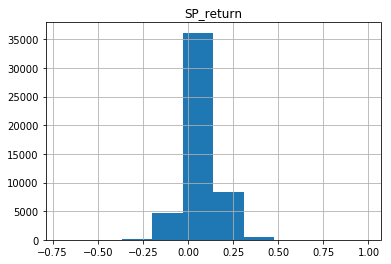

In [0]:
EWMA_sim()

### Garch

kurtosis : 0.12794428768303145
skewness : 0.022088839115509455
variance : 0.012181106365937912


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2aff4522e8>]],
      dtype=object)

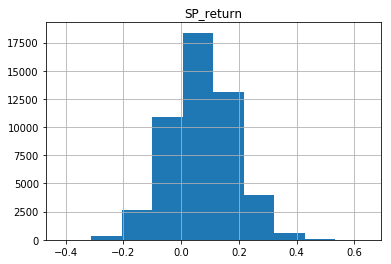

In [0]:
Garch_sim()

### Asymmetric Garch

kurtosis : 0.37463918881769587
skewness : -0.3808158840978681
variance : 0.012105908703653153


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2aff388ba8>]],
      dtype=object)

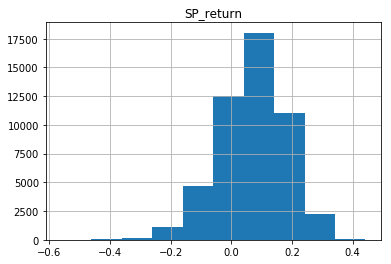

In [0]:
Asymmetric_Garch_sim()